In [245]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [246]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.head()

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1   1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2   2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3   3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4   4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500

In [247]:
df.columns

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [248]:
df.describe()

id        MedInc      HouseAge      AveRooms     AveBedrms  \
count  37137.00000  37137.000000  37137.000000  37137.000000  37137.000000   
mean   18568.00000      3.851029     26.057005      5.163124      1.062204   
std    10720.67281      1.803167     12.158221      1.206242      0.096490   
min        0.00000      0.499900      2.000000      0.851064      0.500000   
25%     9284.00000      2.602300     17.000000      4.357522      1.020305   
50%    18568.00000      3.515600     25.000000      5.068611      1.054545   
75%    27852.00000      4.699700     35.000000      5.858597      1.088825   
max    37136.00000     15.000100     52.000000     28.837607      5.873181   

         Population      AveOccup      Latitude     Longitude   MedHouseVal  
count  37137.000000  37137.000000  37137.000000  37137.000000  37137.000000  
mean    1660.778919      2.831243     35.570030   -119.554329      2.079751  
std     1302.469608      2.702413      2.083179      1.974028      1.158571  
min        3.000000      0.950000     32.550000   -124.350000      0.149990  
25%      952.000000      2.394495     33.930000   -121.800000      1.208000  
50%     1383.000000      2.744828     34.190000   -118.450000      1.808000  
75%     1856.000000      3.125313     37.700000   -118.020000      2.660000  
max    35682.000000    502.990610     41.950000   -114.550000      5.000010

<Axes: >

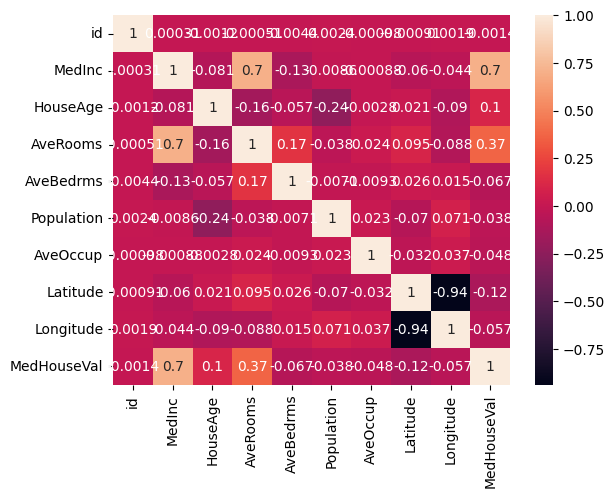

In [249]:
sns.heatmap(df.corr(), annot=True)

In [250]:
features = ['MedInc', 'HouseAge', 'AveRooms']

X_train = df[features]
Y_train = df['MedHouseVal']

X_test = test_df[features]
# Y_test = test_df['MedHouseVal']

In [251]:
X_train, Y_train

(       MedInc  HouseAge  AveRooms
 0      2.3859      15.0  3.827160
 1      3.7188      17.0  6.013373
 2      4.7750      27.0  6.535604
 3      2.4138      16.0  3.350203
 4      3.7500      52.0  4.284404
 ...       ...       ...       ...
 37132  3.3438      50.0  4.936508
 37133  3.7308      26.0  5.087533
 37134  4.1716      52.0  4.678862
 37135  2.7143      16.0  5.710074
 37136  2.2419      34.0  5.424419
 
 [37137 rows x 3 columns],
 0        0.980
 1        0.946
 2        1.576
 3        1.336
 4        4.500
          ...  
 37132    1.856
 37133    1.588
 37134    3.387
 37135    1.592
 37136    0.652
 Name: MedHouseVal, Length: 37137, dtype: float64)

In [252]:
lm = LinearRegression()

In [253]:
lm.fit(X_train, Y_train)

LinearRegression()

In [254]:
predictions = lm.predict(X_test)

In [255]:
Y_train, predictions

(0        0.980
 1        0.946
 2        1.576
 3        1.336
 4        4.500
          ...  
 37132    1.856
 37133    1.588
 37134    3.387
 37135    1.592
 37136    0.652
 Name: MedHouseVal, Length: 37137, dtype: float64,
 array([1.04701912, 0.86068422, 3.75314378, ..., 1.39691431, 3.23074657,
        2.99959526]))

In [256]:
results = {'id': test_df['id'], 'MedHouseVal': predictions}
results_df = pd.DataFrame(results)
results_df

id  MedHouseVal
0      37137     1.047019
1      37138     0.860684
2      37139     3.753144
3      37140     2.926492
4      37141     1.955516
...      ...          ...
24754  61891     1.576103
24755  61892     1.823583
24756  61893     1.396914
24757  61894     3.230747
24758  61895     2.999595

[24759 rows x 2 columns]

In [257]:
results_df.to_csv('prediction.csv', index=False)